[*********************100%%**********************]  1 of 1 completed


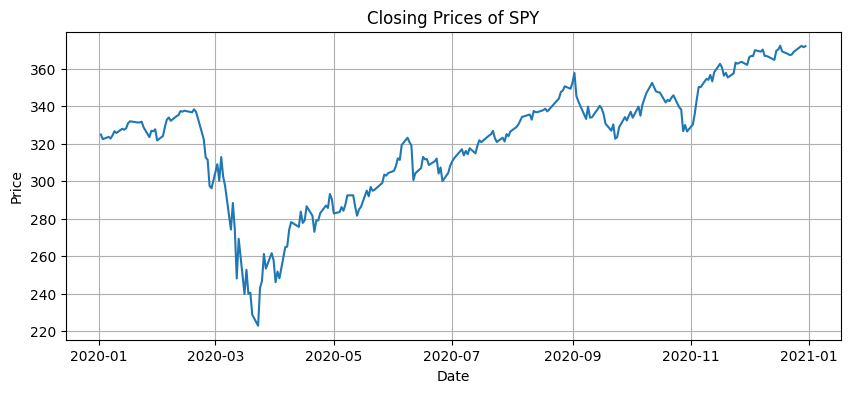

In [14]:
# Block 1: Import Libraries and Fetch Data

import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Function to fetch and display data from Yahoo Finance
def fetch_and_display_data(symbol, start_date, end_date):
    stock_data = yf.download(symbol, start=start_date, end=end_date)
    plt.figure(figsize=(10, 4))
    plt.plot(stock_data['Close'])
    plt.title(f"Closing Prices of {symbol}")
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.grid(True)
    plt.show()
    return stock_data['Close']

# Example usage
symbol = 'SPY'  # Example stock
start_date = '2020-01-01'
end_date = '2020-12-31'
spy_prices = fetch_and_display_data(symbol, start_date, end_date)


In [15]:
# Block 2: Implementing the Trading Strategy

def linear_forecast(prices, N):
    y = np.array(prices[-N:])
    X = np.array(range(N)).reshape(-1, 1)
    model = LinearRegression().fit(X, y)
    forecast = model.predict([[N]])[0]
    r_squared = r2_score(y, model.predict(X))
    return forecast, r_squared

def trading_strategy(prices, N, R0, xB, xS):
    forecast, r_squared = linear_forecast(prices, N)
    last_price = prices[-1]

    if r_squared > R0:
        if forecast > last_price * (1 + xB / 100):
            return "long", forecast, r_squared
        elif forecast < last_price * (1 - xS / 100):
            return "short", forecast, r_squared
    return "hold", forecast, r_squared

# Example usage
N = 20
R0 = 0.7
xB = 2
xS = 2
action, forecast, r_squared = trading_strategy(spy_prices, N, R0, xB, xS)
print(f"Action: {action}, Forecasted Price: {forecast:.2f}, R-squared: {r_squared:.2f}")


Action: hold, Forecasted Price: 370.63, R-squared: 0.23


In [ ]:
# Block 3: Optimizing Parameters and Applying the Strategy with Profit Calculation

def simulate_strategy(symbol, N, R0, xB, xS, start_date, end_date):
    prices = fetch_data(symbol, start_date, end_date)
    cash = 10000  # Starting cash
    position = 0  # Current position in stock
    last_action = "hold"

    for i in range(N, len(prices)):
        action, forecast, r_squared = trading_strategy(prices[:i], N, R0, xB, xS)
        price_today = prices[i]

        if action == "long" and last_action != "long":
            # Buy as much stock as possible
            num_stocks = cash // price_today
            position += num_stocks
            cash -= num_stocks * price_today
            last_action = "long"
        elif action == "short" and last_action != "short":
            # Sell any stock we have
            cash += position * price_today
            position = 0
            last_action = "short"
        # 'Hold' does not change anything

    # Final day: sell any remaining stocks
    cash += position * prices.iloc[-1]
    profit = cash - 10000  # Subtract initial cash to get profit
    return profit

def find_optimal_parameters(symbol, start_date, end_date):
    possible_N = range(5, 30)
    possible_R0 = np.arange(0.5, 0.9, 0.1)
    possible_xB = np.arange(0.5, 5, 0.5)
    possible_xS = np.arange(0.5, 5, 0.5)

    max_profit = 0
    optimal_params = None

    for N in possible_N:
        for R0 in possible_R0:
            for xB in possible_xB:
                for xS in possible_xS:
                    profit = simulate_strategy(symbol, N, R0, xB, xS, start_date, end_date)
                    if profit > max_profit:
                        max_profit = profit
                        optimal_params = (N, R0, xB, xS)

    return optimal_params, max_profit

# Example usage
symbol = 'SPY'  # Replace with your desired stock
start_date = '2020-01-01'
end_date = '2020-12-31'
optimal_params, max_profit = find_optimal_parameters(symbol, start_date, end_date)
print(f"Optimal Parameters: {optimal_params}, Max Profit: {max_profit}")


Streaming output truncated to the last 5000 lines.
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  

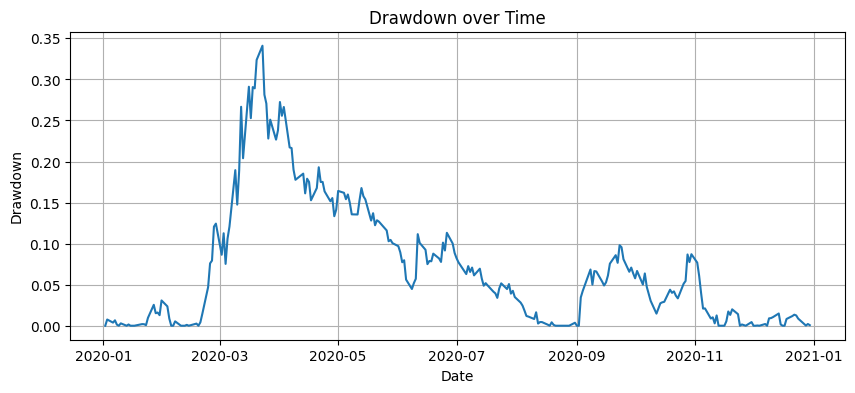

Maximum Drawdown: 34.10%


In [10]:
# Block 4: Calculating Drawdown

def calculate_drawdown(prices):
    max_peak = prices[0]
    max_drawdown = 0
    drawdowns = []

    for price in prices:
        max_peak = max(max_peak, price)
        drawdown = (max_peak - price) / max_peak
        drawdowns.append(drawdown)
        max_drawdown = max(max_drawdown, drawdown)

    # Plot drawdown over time
    plt.figure(figsize=(10, 4))
    plt.plot(prices.index, drawdowns)
    plt.title("Drawdown over Time")
    plt.xlabel("Date")
    plt.ylabel("Drawdown")
    plt.grid(True)
    plt.show()

    return max_drawdown

# Example usage
drawdown = calculate_drawdown(spy_prices)
print(f"Maximum Drawdown: {drawdown * 100:.2f}%")
